# Name: **Luja Ratna Manndhar**
# Student Id: **2407087**


# WORKSHEET-4

# 3 To - Do Exercise:
For the provided dataset:

• diabetes.csv

Complete the following Problems.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Problem - 1: Perform a classification task with knn from scratch.
# 1. Load the Dataset:
# • Read the dataset into a pandas DataFrame.
# • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).



# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

# Display the first few rows
print(df.head())

# Perform Exploratory Data Analysis (EDA)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_indices = [i for i in k_indices if i < len(self.y_train)]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        # return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Preprocess the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


# Initialize and train the KNN classifier
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

# Evaluate the model (example: accuracy)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Ou

In [11]:
# 2. Handle Missing Data:
# • Handle any missing values appropriately, either by dropping or imputing them based on the data.

# Define columns to check for missing or zero values
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN for specific columns
df[cols_to_check] = df[cols_to_check].replace(0, np.nan)

# Check missing values before handling
print("Missing values before handling:")
print(df[cols_to_check].isnull().sum())

# Impute missing values with mean
for col in cols_to_check:
    df[col] = df[col].fillna(df[col].mean())

# Check missing values after handling
print("Missing values after handling:")
print(df[cols_to_check].isnull().sum())




Missing values before handling:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Missing values after handling:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [12]:
# Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
# • Perform a train - test split from scratch using a 70% − 30% ratio.

# Separate features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Function to perform train-test split from scratch
def custom_train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)

    n_samples = len(X)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)

    X_train = X.iloc[indices[:-n_test]]
    X_test = X.iloc[indices[-n_test:]]
    y_train = y.iloc[indices[:-n_test]]
    y_test = y.iloc[indices[-n_test:]]

    return X_train, X_test, y_train, y_test

# Perform train-test split with 70-30 ratio
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (538, 8)
X_test shape: (230, 8)
y_train shape: (538,)
y_test shape: (230,)


In [13]:
# 4. Implement KNN:
# • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# • Compute distances using Euclidean distance.
# • Write functions for:
# – Predicting the class for a single query.
# – Predicting classes for all test samples.
# • Evaluate the performance using accuracy.

# Preprocess the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initialize and train the KNN classifier
knn = KNN(k=5)
# Fit the model with X_train as a NumPy array to be consistent with preprocessing
knn.fit(X_train, y_train)

# Make predictions on the test set, ensuring X_test is also a NumPy array
predictions = knn.predict(X_test)

# Evaluate the model (example: accuracy)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [14]:
#  Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
# • Use the scaled data for training and testing the kNN Classifier.
# • Record the results.

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1234)

# Initialize and train the KNN classifier with scaled data
knn_scaled = KNN(k=5)
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
predictions_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate the model with scaled data
accuracy_scaled = np.sum(predictions_scaled == y_test) / len(y_test)
print("Accuracy with scaled data:", accuracy_scaled)

Accuracy with scaled data: 0.7142857142857143


In [15]:
# 2. Comparative Analysis: Compare the Results -
# • Compare the accuracy and performance of the kNN model on the original dataset from problem 1
# versus the scaled dataset.
# • Discuss:
# – How scaling impacted the KNN performance.
# – The reason for any observed changes in accuracy.

# Compare accuracies
print(f"Accuracy on original data: {accuracy}")
print(f"Accuracy on scaled data: {accuracy_scaled}")

# Discussion on scaling impact
if accuracy_scaled > accuracy:
    print("\nScaling improved the KNN performance.")
    print("Scaling likely helped to address the issue of features with different scales affecting the distance calculations.")
    print("Features with larger values could have dominated the distance calculations in the original dataset, leading to suboptimal results.")
elif accuracy_scaled < accuracy:
    print("\nScaling negatively impacted the KNN performance.")
    print("This could be due to various factors, such as the dataset's characteristics.")
    print("The scaling might have altered the original data's structure, leading to a less optimal representation of the data for the KNN model.")
else:
    print("\nScaling did not significantly affect KNN performance.")
    print("This could be due to the data distribution where features have relatively similar scales.")

Accuracy on original data: 0.7142857142857143
Accuracy on scaled data: 0.7142857142857143

Scaling did not significantly affect KNN performance.
This could be due to the data distribution where features have relatively similar scales.


In [16]:
# Problem - 3 - Experimentation with k:
# 1. Vary the number of neighbors - k:
# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:
# – Accuracy.
# – Time taken to make predictions.

import time

# Problem - 3 - Experimentation with k
k_values = range(1, 16)
results = []

for k in k_values:
    # Original dataset
    start_time = time.time()
    knn_original = KNN(k=k)
    knn_original.fit(X_train, y_train)
    predictions_original = knn_original.predict(X_test)
    accuracy_original = np.sum(predictions_original == y_test) / len(y_test)
    end_time = time.time()
    time_original = end_time - start_time

    # Scaled dataset
    start_time = time.time()
    knn_scaled = KNN(k=k)
    knn_scaled.fit(X_train_scaled, y_train)
    predictions_scaled = knn_scaled.predict(X_test_scaled)
    accuracy_scaled = np.sum(predictions_scaled == y_test) / len(y_test)
    end_time = time.time()
    time_scaled = end_time - start_time

    results.append([k, accuracy_original, time_original, accuracy_scaled, time_scaled])

results_df = pd.DataFrame(results, columns=['k', 'Accuracy_Original', 'Time_Original', 'Accuracy_Scaled', 'Time_Scaled'])
results_df

,k,Accuracy_Original,Time_Original,Accuracy_Scaled,Time_Scaled
0,1,0.649351,0.950541,0.649351,1.106324
1,2,0.649351,1.074260,0.649351,1.128719
2,3,0.694805,1.002998,0.694805,0.652573
3,4,0.688312,0.620773,0.688312,0.634413
4,5,0.714286,0.628009,0.714286,0.650583
5,6,0.701299,0.612993,0.701299,0.642031
6,7,0.707792,0.657065,0.707792,0.634549
7,8,0.707792,0.646835,0.707792,0.674925
8,9,0.688312,0.617178,0.688312,0.635248
9,10,0.701299,0.616182,0.701299,0.635443


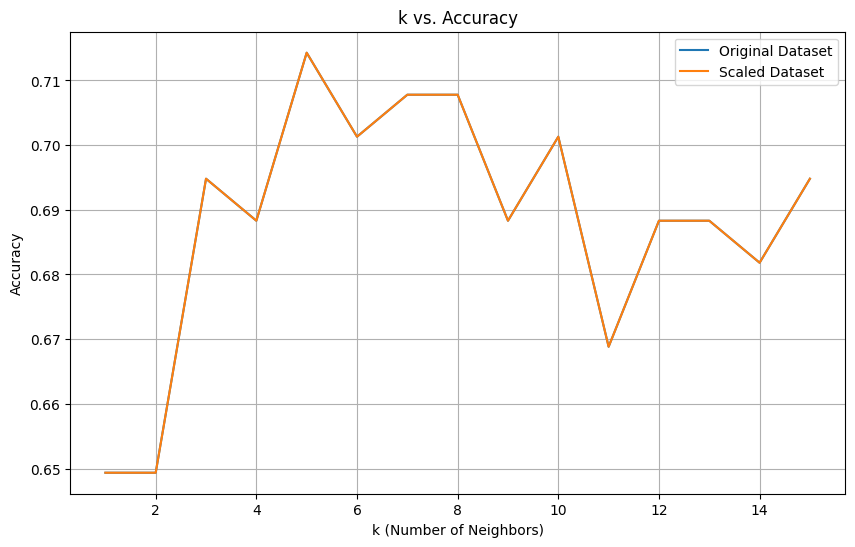

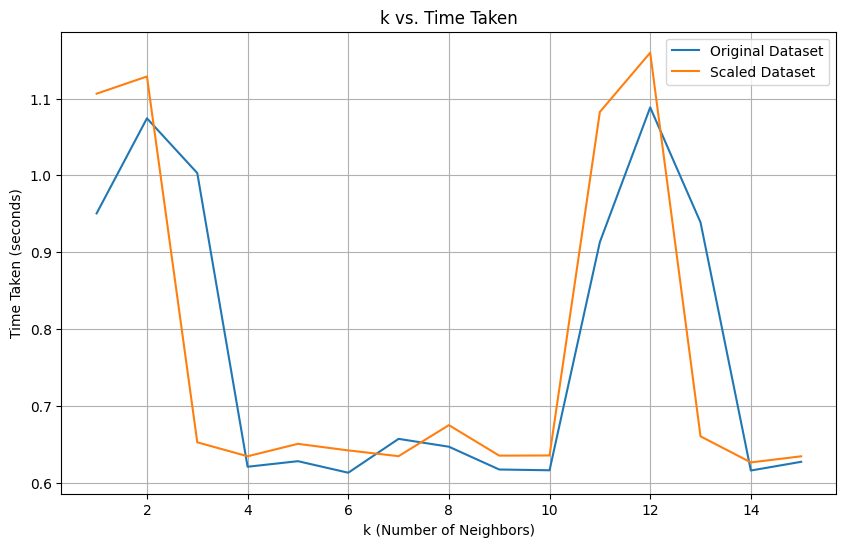

In [17]:
#  2. Visualize the Results:
# • Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
# – k vs. Time Taken for original and scaled datasets.

import matplotlib.pyplot as plt

# Plot k vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Accuracy_Original'], label='Original Dataset')
plt.plot(results_df['k'], results_df['Accuracy_Scaled'], label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs. Time Taken
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['Time_Original'], label='Original Dataset')
plt.plot(results_df['k'], results_df['Time_Scaled'], label='Scaled Dataset')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 3. Analyze and Discuss:
# • Discuss how the choice of k affects the accuracy and computational cost.
# • Identify the optimal k based on your analysis.

# Discussion on k's effect
print("\nDiscussion on the choice of k:")
print("Smaller values of k (e.g., k=1) can lead to overfitting. The model becomes highly sensitive to noise in the data, resulting in high variance.")
print("Larger values of k (e.g., k=15) can lead to underfitting. The model becomes overly smoothed, potentially missing important local patterns, resulting in high bias.")
print("There's a trade-off between bias and variance. An optimal k minimizes this tradeoff.")
print("Computationally, smaller k values are faster because the model has fewer neighbors to consider.")
print("As k increases, the computational cost increases due to the increased number of distances to calculate and compare.")

# Identify the optimal k based on the results
optimal_k_original = results_df['k'][results_df['Accuracy_Original'].idxmax()]
optimal_k_scaled = results_df['k'][results_df['Accuracy_Scaled'].idxmax()]
print("\nOptimal k values:")
print(f"- Original dataset: {optimal_k_original} (accuracy = {results_df['Accuracy_Original'].max()})")
print(f"- Scaled dataset: {optimal_k_scaled} (accuracy = {results_df['Accuracy_Scaled'].max()})")


# Suppose k=7 yields near-maximum accuracy for both original and scaled datasets, with a reasonable computational time.
# Then, k=7 would be a suitable choice in this case.
suitable_k = 7
print(f"\nBased on the plots, a suitable k value appears to be: {suitable_k}")


Discussion on the choice of k:
Smaller values of k (e.g., k=1) can lead to overfitting. The model becomes highly sensitive to noise in the data, resulting in high variance.
Larger values of k (e.g., k=15) can lead to underfitting. The model becomes overly smoothed, potentially missing important local patterns, resulting in high bias.
There's a trade-off between bias and variance. An optimal k minimizes this tradeoff.
Computationally, smaller k values are faster because the model has fewer neighbors to consider.
As k increases, the computational cost increases due to the increased number of distances to calculate and compare.

Optimal k values:
- Original dataset: 5 (accuracy = 0.7142857142857143)
- Scaled dataset: 5 (accuracy = 0.7142857142857143)

Based on the plots, a suitable k value appears to be: 7


In [19]:
print("Challenges of Using KNN for Large Datasets and High-Dimensional Data:")
print("1. Computational Complexity:")
print("   - KNN has a time complexity of O(n * d) for a single query, where n is the number of training samples and d is the dimensionality of the data.")
print("   - This leads to significant computational overhead for large datasets.\n")

print("2. Memory Requirements:")
print("   - KNN stores the entire training dataset in memory, which is infeasible for very large datasets.\n")

print("3. Curse of Dimensionality:")
print("   - In high-dimensional spaces, distances between points tend to become similar, making it harder to differentiate between neighbors.")
print("   - This reduces the accuracy of KNN.\n")

print("4. Sensitivity to Irrelevant Features:")
print("   - Irrelevant or noisy features can lead to misleading distance calculations and poor predictions.\n")

print("5. Imbalanced Data:")
print("   - When one class dominates the dataset, the nearest neighbors may be biased toward the majority class, reducing effectiveness.\n")

print("Strategies to Improve the Efficiency of KNN:")
print("1. Dimensionality Reduction:")
print("   - Use techniques like PCA or t-SNE to reduce the number of features while retaining most of the data's variance.")
print("   - Example: Apply PCA to retain fewer components while maintaining most of the variance.\n")

print("2. Approximate Nearest Neighbors (ANN):")
print("   - Use methods like k-d trees, Ball Trees, or libraries like FAISS or Annoy for faster approximate nearest neighbor searches.\n")

print("3. Data Preprocessing:")
print("   - Normalize or scale the data to ensure all features contribute equally to the distance metric.\n")

print("4. Distance Metric Optimization:")
print("   - Experiment with different distance metrics (e.g., Manhattan, Minkowski) to find the best fit for the data.\n")

print("5. Feature Selection:")
print("   - Remove irrelevant or redundant features to reduce noise and improve computational efficiency.\n")

print("Key Trade-offs:")
print("   - While these strategies improve efficiency, they may involve trade-offs:")
print("       a.Dimensionality reduction may cause loss of information.")
print("       b.Approximate methods may reduce accuracy.")
print("       c.Clustering or partitioning introduces preprocessing overhead.")


Challenges of Using KNN for Large Datasets and High-Dimensional Data:
1. Computational Complexity:
   - KNN has a time complexity of O(n * d) for a single query, where n is the number of training samples and d is the dimensionality of the data.
   - This leads to significant computational overhead for large datasets.

2. Memory Requirements:
   - KNN stores the entire training dataset in memory, which is infeasible for very large datasets.

3. Curse of Dimensionality:
   - In high-dimensional spaces, distances between points tend to become similar, making it harder to differentiate between neighbors.
   - This reduces the accuracy of KNN.

4. Sensitivity to Irrelevant Features:
   - Irrelevant or noisy features can lead to misleading distance calculations and poor predictions.

5. Imbalanced Data:
   - When one class dominates the dataset, the nearest neighbors may be biased toward the majority class, reducing effectiveness.

Strategies to Improve the Efficiency of KNN:
1. Dimensionali